# Data At Scale: Capstone Project -- Final report
## Predicting blight in the city of Detroit, MI

## 1 Executive Summary

This project is part of the [Coursera Data Science at Scale Specialization](https://www.coursera.org/specializations/data-science) proposed by University of Washington and taught by Bill Howe. 
The objective of this assignment is to analyse various data source collected by the city of Detroit in order to build a model that could predict whether a building is likely to be blighted. The data was provided in  [datasci-capstone/get-the-data](https://www.coursera.org/learn/datasci-capstone/supplement/D44tm/get-the-data). 
Alternatively The data is available on the [Data At Scale Github repository: Capstone](https://github.com/uwescience/datasci_course_materials/tree/master/capstone/blight).

We use the processed files we generated and described in a preceeding notebook [Github repository: Preprocessing](https://github.com/BreizhZut/CourseraDataAtScaleCapStone_Predicting_blight_in_Detroit/blob/master/Capstone_preprocessing.ipynb). The current steps is to add features to our test and train data set for which we have labelled building locations as demolished and not demolished.

Feature creation consists on aggregating local blight violations, 311 complaints and cirmes to the building. In the case of bight violations we considered the total amounts associated to payment status (not applied, not paid, partially paid and paid in full). We aggregate these feature into 30 m grid cell (100 feet), and further aggregate around each set of coordinates corresponding to buildings in our train and test set. For the blight-violation features we use 1 grid cell in each direction, for the other two set we use 15 grid cells (475 m or 1500 feet). 

We train multiple models using maching learning techniques, using with 5 fold cros-validation for hyperparameter tuning. 
With simple decision trees we find:

* Blight violation are the most relevant features, since a decision tree based on the number of 311 calls and crimes perform with a low accuracy of 58% on the train set and 54% on the test set. 
* By training decision trees on the blight violations features, using blight violation amounts instead of number of violations leads to better results with training accuracy increasing from 61.6% to 62.9%. 
* This pattern is confirmed by adding the number of 311 calls and crimes to these models, we observe train accuracy rising form 63.9% to 64.5% and test accuracy from 62.7% to 63.2%. 

Moving to boosted models, we fisrt try a simple majority vote scheme models on 3 of the decision trees performed earlier on differents features. 

* **Majority vote**: we first combine the first 3 models with a majority vote scheme and obtain an accuracy of 63.5% in both train and test set 
* **Random Forests**: we use a random forest on all features and obtain a train accuracy of 64.5% and a test accuracy of 64%.

Future improvements would require to relate with greater accuracy the demolition and blight dateset, ideally with some parcel id. On top of that, data augmentation would help improving performence. It may be more relevent to add 3 to 5 time more negative examples to build models on a more realistic sample. Finally additionnal features should help greatly combined with pooling methods, for exemple counting crimes or 311 complains by categories. 

## 2 Data

### 2.1 Source

The original data consists on:

* [detroit-blight-violations.csv](https://d3c33hcgiwev3.cloudfront.net/_97bd1c1e5df9537bb13398c9898deed7_detroit-blight-violations.csv?Expires=1525305600&Signature=eFD51fReW6lMTqFcCeDbQ1kgqi8sYAwZP7vMgVhsOOlv2QDrs61mX1tIBwdaqjaCVezWE30qjVPBzimiEafX2itPJiEPovHCzlOWMvnPe8x5RIeS-SbU0yPbG6~AHF7Cb0XITaoKlVmnMIAtiLstPqOOYfdhjUILu5~1dRNu8SE_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A): contains a list of blight violations from which we constitute a list of buidlings
* [detroit-demolition-permits.tsv](https://d3c33hcgiwev3.cloudfront.net/_dcebfb2135a2bf5a6392493bd61aba22_detroit-demolition-permits.tsv?Expires=1525305600&Signature=f1GJGdUQshH1-g6GhDS-yUETWwkRis45gX9L85AGoXEuDHSzEhfdXWdo~tEbD~XHSXeRMNrgogVy-EYmO8t~7nfTnYt96LAcNxe73BTgvGdBDO~LdvA222Z9zs0sRxZAifSPbXnsW9jbxlDaqdnZNvc~zOkWxCN9aYQ2sBFujYQ_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A): contains a list of buildings for which demolition permits have been issued. We use that file to define the labels of our building, e.g. whether a building from the blight-violation dataset is blighted or not.
* [detroit-311.csv](https://d3c33hcgiwev3.cloudfront.net/_dcebfb2135a2bf5a6392493bd61aba22_detroit-311.csv?Expires=1525305600&Signature=al11Hk1qn7CACblYpryhkWbcoHm6dXQkRw~Mu7y6ONBEDy0rdQIjLHvwN8IqOsV6OFNOudDrinXBEz-m5Q9A2GZrvR0~bbnuZbsFd7y7eQTv~o-NazxOfLPwRUwViGCxSxcQhwBTiV0VjySP4fgExZwFX2xVwQqInjrKQYHs8iM_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A): contains a list of 311 complains
* [detroit-crime.csv](https://d3c33hcgiwev3.cloudfront.net/_dcebfb2135a2bf5a6392493bd61aba22_detroit-crime.csv?Expires=1525305600&Signature=N0vg~4Jgqn6b-w-UEAQ3q0v3EbzgM9akDsHbn2o54WCdzh0Zzw~yJrcoBTHzkpBu0b3e4IiEFHUdKgVjryQRumLznIbaqEe146IC7FJqq8QqYWHVLcfquK9f3IXfCzoSNGeXGPWgT2l0BbzwAR6hxHeKxAxrXEajM7YWNwwIL7U_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A): list crimes in the city area.

### 2.2 Processed the data sources

Given the fact that the address are not necessarly well formatted, we need to rely on gps coordinates to combine the different datasets. Even though each dataset contains gps coordinates associated to most incidents, these are not always reliable. The initial task was to actually extract useful features from the original data into processed data-sets.
The description of the post-processing is described in [Github repository: Preprocessing](https://github.com/BreizhZut/CourseraDataAtScaleCapStone_Predicting_blight_in_Detroit/blob/master/Capstone_preprocessing.ipynb).

 
* *blight_demolition.csv*: processed demotion-permit dataset
  * **address**: address of the demolition site (not relevant for the models)
  * **date**: date of issue of the demolition permit m/d/y (not relevant for the models)
  * **type**: Takes value "DISM" or "Dismantle"
  * **long**: longitude 
  * **lat**: latitude
  
  
* *blight_incident_count.csv*: processed blight violation dataset
  * **ViolationStreetNumber**: Street number extracted from the source file, instance with negative or missing value were removed (not relevant for the models)
  * **ViolationStreetName**: Street number extracted from the source file, street abbreviations were removed (not relevant for the models)
  * **address**: Vialtion address concatenated from  ViolationStreetNumber and ViolationStreetName (not relevant for the models)
  * **blight_inc**: number of blight violations associated to the adress 	
  * **blight_paid**: total amount in USD assocated with the original *PAID IN FULL* label
  * **blight_partial**: total amount in USD associated with the original *PARTIAL PAYMENT MADE* label
  * **blight_nopaid**: total amount in USD associated with the original *NO PAYMENT ON RECORD* label
  * **blight_notapplied**: total amount in USD associated with the original *NO PAYMENT APPLIED* label
  * **long**: longitude 
  * **lat**: latitude


* *c311_incident_count.csv*	
  * **long**: longitude associated to the complaint
  * **lat**: latitude associated to the complaint
  * **inc_311**: number of incidents reported through 311 call for these set of coordinates


* *crime_incident_count.csv*
  * **long**: longitude associated to the complaint
  * **lat**: latitude associated to the complaint
  * **crime_inc**: number of incidents reported through 311 call for these set of coordinates


* *test_set.csv*
  * **long**: longitude associated to the location
  * **lat**: latitude associated to the location
  * **demolition**: Categorical 1: demolition permit issued, 0: no demolition permit issued 


* *train_set.csv*
  * **long**: longitude associated to the location
  * **lat**: latitude associated to the location
  * **demolition**: Categorical 1: demolition permit issued, 0: no demolition permit issued 


* *grid.json*: json file containing parameters for reproducing a grid accross the city 

## 3 Combining data sets

Before we start processing the data, we import the following python packages.

In [1]:
# use this for incorporating figure in the notebook
%matplotlib inline              
import matplotlib.pyplot as plt # for vizualisation
import os                       # file system utilities
import time                     # for mesuring CPU time
import json                     # json library
import pandas as pd             # data processing
from datetime import datetime   # for treating dates
import geopy.distance           # gps cooridnate convertion
from collections import Counter # usefull function
import sklearn                  # machine learning library
import graphviz                 # visualization for dot
# Machine learning libraries and utilities
from sklearn import tree        # classification trees
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### 3.1 Grid helper functions

* First we define a fixe area for Detroit city limit
* Then we define several helper fonctions to:
    * select rows within the city area
    * define a grid using a fixed resolution in m
    * convert gps coordinate into a grid index

In [2]:
processed_path = "Processed"+os.sep
jsoncon = open(processed_path+"grid.json","r")
grid_json = json.loads(jsoncon.read())
jsoncon.close()
gps_box = grid_json['box']
gdef = grid_json['grid']

In [3]:
def within_area(gps_coords):
    """
    read series with lat and long fields
    returns True if coordinates are within box area
    retruns False otherwise
    """
    if any(gps_coords[["long","lat"]].isnull()):
        return False
    if gps_coords["long"] < gps_box["long"][0]:
        return False
    elif gps_coords["long"] > gps_box["long"][1]:
        return False
    if gps_coords["lat"] < gps_box["lat"][0]:
        return False
    elif gps_coords["lat"] > gps_box["lat"][1]:
        return False
    return True

The grid parameter were generated with the following method. We copy it to this notebook to create a new gird if necessary

In [4]:
def prep_grid(dg):
    """
    Take a dstance in meter as input
    Read the gps_box 
    Returns a dictionnary defining the grid
    """
    # we use differents scale for lattitude and longitudes 
    dlat = (gps_box["lat"][1]-gps_box["lat"][0])*dg/gps_box["Dy"]
    dlong = (gps_box["long"][1]-gps_box["long"][0])*dg/gps_box["Dx"]
    nx = int(gps_box["Dx"]/dg) + 1
    ny = int(gps_box["Dy"]/dg) + 1
    return {"dlat":dlat,"dlong":dlong,"nx":nx,"ny":ny,"scale":dg}

To ensure that non demolished buildings would not overlap with the demolished dataset, we previously used a 60m grid to combine the data. Now we want to improve precision for combining blight and demolition dataset we move to a 30m scale.

In [5]:
scal = 30
gdef = prep_grid(scal)

This method project gps coordinates into the grid and return an index. We shall use this method to aggregate each processed datasets into the grid

In [6]:
def build_grid_index(line):
    """
    Takes a row containing fileds "long" and "lat" as input
    Return a grid index corresponding to the gird defined as gdef
    Note: row must have been selected with the select_within_area method
    """
    ix = int((line["long"]-gps_box["long"][0])/gdef["dlong"])
    iy = int((line["lat"]-gps_box["lat"][0])/gdef["dlat"])
    return iy*gdef["nx"] + ix

### 3.2 Aggregating processed datasets into the gird

For each of the blight-incidents, 311 calls and crimes datasets, we
* read the datasets.
* apply the grid
* aggregate the data by grid index into a new dataframe

In [7]:
# read the file and associate gird indexes as a new feature
blight_inc = pd.read_csv(processed_path+"blight_incident_count.csv")
blight_inc["grid"] = blight_inc.apply(build_grid_index,axis=1)
# select the columns to aggregate and create the aggregated data frame
blight_col = ["long","lat","blight_inc","blight_paid","blight_partial","blight_nopaid","blight_notapplied","grid"]
blight_grid = blight_inc[blight_col].groupby("grid").agg({
    "lat":"mean",
    "long":"mean",
    "blight_inc":"sum",
    "blight_paid":"sum",
    "blight_partial":"sum",
    "blight_nopaid":"sum",
    "blight_notapplied":"sum"
})
blight_grid.head()

,blight_notapplied,long,blight_paid,blight_partial,blight_nopaid,lat,blight_inc
grid,,,,,,,
33299,4440.0,-83.160440,660.0,0.0,0.0,42.255977,3
34787,120.0,-83.160905,0.0,0.0,0.0,42.256221,1
34790,2220.0,-83.160147,120.0,0.0,0.0,42.256343,8
36278,240.0,-83.160621,0.0,0.0,0.0,42.256560,2
36279,240.0,-83.160551,0.0,0.0,0.0,42.256641,2


In [8]:
# read the file and associate gird indexes as a new feature
c311_inc = pd.read_csv(processed_path+"c311_incident_count.csv")
c311_inc["grid"] = c311_inc.apply(build_grid_index,axis=1)
# create the aggregated data frame
c311_grid = c311_inc.groupby("grid").agg({
    "lat":"mean",
    "long":"mean",
    "inc_311":"sum",
})
c311_grid.head()

,lat,inc_311,long
grid,,,
31809,42.255736,1,-83.160580
33298,42.256102,1,-83.160697
34790,42.256356,1,-83.160224
37771,42.256990,2,-83.159955
45213,42.258149,1,-83.161980


In [9]:
# read the file and associate gird indexes as a new feature
crime_inc = pd.read_csv(processed_path+"crime_incident_count.csv")
crime_inc["grid"] = crime_inc.apply(build_grid_index,axis=1)
# create the aggregated data frame
crime_grid = crime_inc.groupby("grid").agg({
    "lat":"mean",
    "long":"mean",
    "crime_inc":"sum",
})
crime_grid.head()

,lat,crime_inc,long
grid,,,
28826,42.2553,1,-83.1612
28908,42.2554,1,-83.1392
31806,42.2558,1,-83.1613
33294,42.2560,1,-83.1619
33368,42.2561,1,-83.1420


We may select one of several neighboring cells. By using this aggregation we run part of the aggregation thus reducing the amount of duplicated calculations in the rest of the notebook.

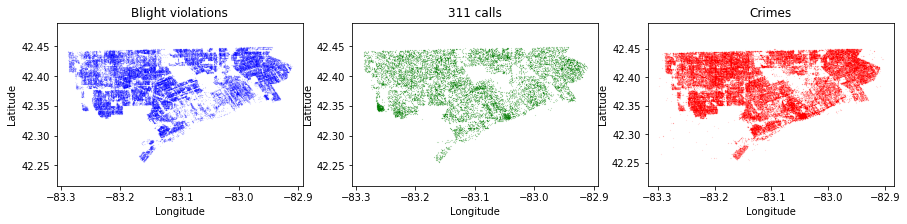

In [10]:
fig = plt.figure(figsize=(15,3))
axl  = plt.subplot(131)
axb = blight_grid.plot.scatter(x="long",y="lat",s=0.01,color="blue",alpha=0.3,ax=axl)
xlab = plt.xlabel("Longitude")
ylab = plt.ylabel("Latitude")
xl = plt.xlim(gps_box["long"])
yl = plt.ylim(gps_box["lat"])
xy = plt.axis('equal')
ltit = plt.title("Blight violations")
axm = plt.subplot(132)
ax311 = c311_grid.plot.scatter(x="long",y="lat",s=0.01,color="green",alpha=0.8,ax=axm)
xlab = plt.xlabel("Longitude")
ylab = plt.ylabel("Latitude")
xl = plt.xlim(gps_box["long"])
yl = plt.ylim(gps_box["lat"])
xy = plt.axis('equal')
mtit = plt.title("311 calls")
axr = plt.subplot(133)
ax311 = crime_grid.plot.scatter(x="long",y="lat",s=0.01,color="red",alpha=0.4,ax=axr)
xlab = plt.xlabel("Longitude")
ylab = plt.ylabel("Latitude")
xl = plt.xlim(gps_box["long"])
yl = plt.ylim(gps_box["lat"])
xy = plt.axis('equal')
rtit = plt.title("Crimes")

### 3.3 Creating features on the test and train set

* We first read the training and testing data sets
* We represent in the figure for both training and test sets the demolished building in red and the non demolished in blue
* For each data set we build the following features
    * total number of blight violations within 1 grid cell
    * total blight violation amount per blight_paid, blight_partial, blight_nopaid and  blight_notapplied categories within 1 grid cell
    * total number of 311 calls within 15 grid cell
    * total number of crimes within 15 grid cell

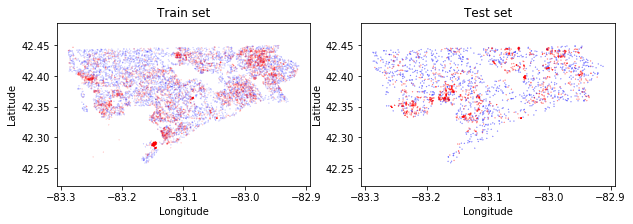

In [11]:
# reading the data set
train = pd.read_csv(processed_path+"train_set.csv")
test  = pd.read_csv(processed_path+"test_set.csv")

# checking the data set by visuzlization
cmap = {1: 'red', 0: 'blue'}
fig = plt.figure(figsize=(10,3))
axl  = plt.subplot(121)
axb = train.plot.scatter(x="long",y="lat",s=0.01,alpha=0.9,ax=axl,
                         c=[cmap.get(c, 'black') for c in train.demolition])
xlab = plt.xlabel("Longitude")
ylab = plt.ylabel("Latitude")
xl = plt.xlim(gps_box["long"])
yl = plt.ylim(gps_box["lat"])
xy = plt.axis('equal')
ltit = plt.title("Train set")
axr = plt.subplot(122)
ax311 = test.plot.scatter(x="long",y="lat",s=0.05,alpha=0.9,ax=axr,
                          c=[cmap.get(d) for d in test.demolition])
xlab = plt.xlabel("Longitude")
ylab = plt.ylabel("Latitude")
xl = plt.xlim(gps_box["long"])
yl = plt.ylim(gps_box["lat"])
xy = plt.axis('equal')
rtit = plt.title("Test set")

We confirm with the figure above that both train set and train set appear to be correct in term of distribution of buildings and their labels, as a fonction of gps coordinates. We now proceed if adding features to these labelled datasets from the 3 dataset we have previously preprocessed.

In [12]:
# aggregate features of the neighbouring cells 
ng_blight = 1
agg_col = ["blight_inc","blight_paid","blight_partial","blight_nopaid","blight_notapplied"]
glat = gdef["dlat"]*(ng_blight+0.5)
glong = gdef["dlong"]*(ng_blight+0.5)
def add_blight_features(line):
    """
    Take a row containing latitude and logitude
    Select grid sel of the blight dataset within the area
    Aggregate en return corresponding features
    """
    lat_sel = pd.np.logical_and(blight_grid.lat < line["lat"]+glat,blight_grid.lat > line["lat"]-glat)
    long_sel = pd.np.logical_and(blight_grid.long < line["long"]+glong,blight_grid.long > line["long"]-glong)
    g_sel = pd.np.logical_and(lat_sel,long_sel)
    return blight_grid.loc[g_sel,agg_col].apply(sum)
train = train.merge(
    train.apply(add_blight_features,axis=1),
    left_index=True,right_index=True)
train.fillna(0,inplace=True)
test = test.merge(
    test.apply(add_blight_features,axis=1),
    left_index=True,right_index=True)
test.fillna(0,inplace=True)

In [13]:
# aggregate features of the neighbouring cells 
ng_311 = 15
glat = gdef["dlat"]*(ng_311+0.5)
glong = gdef["dlong"]*(ng_311+0.5)
def add_311_features(line):
    """
    Take a row containing latitude and logitude
    Select grid sel of the blight dataset within the area
    Aggregate en return corresponding features
    """
    lat_sel = pd.np.logical_and(c311_grid.lat < line["lat"]+glat,c311_grid.lat > line["lat"]-glat)
    long_sel = pd.np.logical_and(c311_grid.long < line["long"]+glong,c311_grid.long > line["long"]-glong)
    g_sel = pd.np.logical_and(lat_sel,long_sel)
    return c311_grid.loc[g_sel,"inc_311"].sum()
train["inc_311"] = train.apply(add_311_features,axis=1)
test["inc_311"] = test.apply(add_311_features,axis=1) 

In [14]:
# aggregate features of the neighbouring cells 
ng_crime = 15
glat = gdef["dlat"]*(ng_crime+0.5)
glong = gdef["dlong"]*(ng_crime+0.5)
def add_crime_features(line):
    """
    Take a row containing latitude and logitude
    Select grid sel of the blight dataset within the area
    Aggregate en return corresponding features
    """
    lat_sel = pd.np.logical_and(crime_grid.lat < line["lat"]+glat,crime_grid.lat > line["lat"]-glat)
    long_sel = pd.np.logical_and(crime_grid.long < line["long"]+glong,crime_grid.long > line["long"]-glong)
    g_sel = pd.np.logical_and(lat_sel,long_sel)
    return crime_grid.loc[g_sel,"crime_inc"].sum()
train["crime_inc"] = train.apply(add_crime_features,axis=1)
test["crime_inc"] = test.apply(add_crime_features,axis=1) 

We now see the appearance of the final dataset combining all features. We mentions that even though the gps cooridinates are included in this data set they are not part of the models we create bellow.

In [15]:
train.head()

,long,lat,demolition,blight_inc,blight_paid,blight_partial,blight_nopaid,blight_notapplied,inc_311,crime_inc
0,-82.978012,42.412112,0,0.0,0.0,0.0,0.0,0.0,43,231
1,-82.992764,42.377932,1,7.0,0.0,0.0,0.0,3420.0,36,109
2,-83.286062,42.438711,0,3.0,4380.0,0.0,0.0,180.0,18,93
3,-83.132418,42.415267,0,1.0,180.0,0.0,0.0,0.0,33,199
4,-83.147667,42.290693,1,9.0,360.0,0.0,0.0,2580.0,11,17


#### 4 Using Machine learning to predict demolition 

### 4.1 Preparing inputs and outputs

We start by selecting different inputs for our method defining differents models

* **Model 0**: takes only the number of local blight violations as input
* **Model 1**: takes only the differents local blight violations amounts associated to their payment status.
* **Model 2**: takes only the number of local 311 calls and local crime incidets as input
* **Model 3**: takes only the number of local blight violations, 311 calls and local crime incidets as input
* **Model 4**: use all features from Model 1 and Model 3
* **Model 5**: use all features

In [16]:
train_label = train["demolition"].values.reshape(len(train),)
test_label = test["demolition"].values.reshape(len(test),)
mod0_lab = {"blight_inc":"blight violations"}
mod2_lab = {"inc_311":"311 calls","crime_inc":"crimes"}
mod1_lab = {"blight_paid":"Blight paid","blight_partial":"Blight partiel",
            "blight_nopaid":"Blight unpaid","blight_notapplied":"Blight not applied"}
mod3_lab = {"blight_inc":"blight violations","inc_311":"311 calls","crime_inc":"crimes"}
mod4_lab = {"inc_311":"311 calls","crime_inc":"crimes",
            "blight_paid":"Blight paid","blight_partial":"Blight partiel",
            "blight_nopaid":"Blight unpaid","blight_notapplied":"Blight not applied"}
mod5_lab = {"blight_inc":"blight violations","inc_311":"311 calls","crime_inc":"crimes",
            "blight_paid":"Blight paid","blight_partial":"Blight partiel",
            "blight_nopaid":"Blight unpaid","blight_notapplied":"Blight not applied"}
train0   = train[mod0_lab.keys()].values.reshape(len(train),len(mod0_lab))
train1   = train[mod1_lab.keys()].values.reshape(len(train),len(mod1_lab))
train2   = train[mod2_lab.keys()].values.reshape(len(train),len(mod2_lab))
train3   = train[mod3_lab.keys()].values.reshape(len(train),len(mod3_lab))
train4   = train[mod4_lab.keys()].values.reshape(len(train),len(mod4_lab))
train5   = train[mod5_lab.keys()].values.reshape(len(train),len(mod5_lab))
test0    = test[mod0_lab.keys()].values.reshape(len(test),len(mod0_lab))
test1    = test[mod1_lab.keys()].values.reshape(len(test),len(mod1_lab))
test2    = test[mod2_lab.keys()].values.reshape(len(test),len(mod2_lab))
test3    = test[mod3_lab.keys()].values.reshape(len(test),len(mod3_lab))
test4    = test[mod4_lab.keys()].values.reshape(len(test),len(mod4_lab))
test5    = test[mod5_lab.keys()].values.reshape(len(test),len(mod5_lab))
# set random seed
pd.np.random.seed(42)

We create an helper function so that we may evaluate each model the same way, computing:
* Accuracy
* Precsion
* Recall
* True Negative fraction
* True Positive fraction
* False Negative fraction
* False Positive fraction

In [17]:
def sumary_perf(label,pred,name="dataset"):
    cmatrix = confusion_matrix(label,pred,labels=[0,1])
    return pd.Series({
        "Accuracy": sklearn.metrics.accuracy_score(label,pred, normalize=True),
        "Precision":cmatrix[1][1]/float(cmatrix[1][1]+cmatrix[0][1]),
        "Recall":cmatrix[1][1]/float(cmatrix[1][1]+cmatrix[1][0]),
        "True negative": cmatrix[0][0]/float(len(label)),
        "True positive": cmatrix[1][1]/float(len(label)),
        "False negative": cmatrix[1][0]/float(len(label)),
        "False positive": cmatrix[0][1]/float(len(label))
    },name=name
)  

### 4.2 Decision trees

In [18]:
param_grid = {'max_depth': range(1,10),"max_leaf_nodes":[5,10,30,50,100,150,200,250]}
dectree = GridSearchCV(tree.DecisionTreeClassifier(class_weight='balanced'), param_grid,cv=5)

### 4.2.1 Decision tree 0: number of blight-violations

This model takes only the number of local blight violations as input.
As we see we obtain an accuracy higher than 50% but the test accuracy at 63% is larger that the train accuracy at 61.6%. This means that the test sample is not large enough to enable us to estimate the true accuracy.

In [19]:
tree_0 = dectree.fit(train0,train_label)
train_pred0 = tree_0.predict(train0)
test_pred0 = tree_0.predict(test0)
perf_tree0 = pd.DataFrame()
perf_tree0 = perf_tree0.append(sumary_perf(train_label,train_pred0,name="Train"))
perf_tree0 = perf_tree0.append(sumary_perf(test_label,test_pred0,name="Test"))
perf_tree0

,Accuracy,False negative,False positive,Precision,Recall,True negative,True positive
Train,0.615881,0.144322,0.239797,0.597301,0.711355,0.260203,0.355678
Test,0.629876,0.128631,0.241494,0.605958,0.742739,0.258506,0.371369


### 4.2.2 Decision tree 1: blight-violation amounts

By using the different blight violation amounts instead of the number of violations. We find that a decision tree performs better on the blight dataset. We obtain 62.9% accuracy on the train set and a more logical 62.7% accuracy on the test set.

In [20]:
tree_1 = dectree.fit(train1,train_label)
train_pred1 = tree_1.predict(train1)
test_pred1 = tree_1.predict(test1)
perf_tree1 = pd.DataFrame()
perf_tree1 = perf_tree1.append(sumary_perf(train_label,train_pred1,name="Train"))
perf_tree1 = perf_tree1.append(sumary_perf(test_label,test_pred1,name="Test"))
perf_tree1

,Accuracy,False negative,False positive,Precision,Recall,True negative,True positive
Train,0.629203,0.158490,0.212307,0.616648,0.683020,0.287693,0.341510
Test,0.627386,0.162241,0.210373,0.616200,0.675519,0.289627,0.337759


### 4.2.3 Decision tree 2: number of 311 calls and crime incidents

In this model, we do not use the blight incident at all, but simply number of local 311 calls and local crime incidets. This model was used to tune the number of grid cells to use for defining "local". With 15 cell of 100 feet, we find a 58.2% accuracy on the train set but 54.3% on the test set. This implies that on top of bias issues, this model suffers from variance issues and overfits.

In [21]:
tree_2 = dectree.fit(train2,train_label)
train_pred2 = tree_2.predict(train2)
test_pred2 = tree_2.predict(test2)
perf_tree2 = pd.DataFrame()
perf_tree2 = perf_tree2.append(sumary_perf(train_label,train_pred2,name="Train"))
perf_tree2 = perf_tree2.append(sumary_perf(test_label,test_pred2,name="Test"))
perf_tree2

,Accuracy,False negative,False positive,Precision,Recall,True negative,True positive
Train,0.581941,0.211778,0.206280,0.582852,0.576443,0.293720,0.288222
Test,0.543154,0.233195,0.223651,0.543993,0.533610,0.276349,0.266805


### 4.2.5 Decision tree 3: number of blight violations, 311 calls and crimes 

Combining all types of incidents by using the number of local blight violations, 311 calls and local crime incidents, leads to a train accuracy of 63.9% and a test accuracy of 62.9%. This is only slightly better than Model 1 based on the blight violation amount.

In [22]:
tree_3 = dectree.fit(train3,train_label)
train_pred3 = tree_3.predict(train3)
test_pred3 = tree_3.predict(test3)
perf_tree3 = pd.DataFrame()
perf_tree3 = perf_tree3.append(sumary_perf(train_label,train_pred3,name="Train"))
perf_tree3 = perf_tree3.append(sumary_perf(test_label,test_pred3,name="Test"))
perf_tree3

,Accuracy,False negative,False positive,Precision,Recall,True negative,True positive
Train,0.639141,0.144217,0.216642,0.621537,0.711567,0.283358,0.355783
Test,0.628631,0.143154,0.228216,0.609929,0.713693,0.271784,0.356846


### 4.2.6 Decision tree 4: blgiht violation amounts, number of 311 calls and crimes

Now combining the blight violations amounts and the number of local 311 complains and crimes, performs best for these decision trees with a train accuracy of 64.5% and a test accuracy of 63.2%

In [23]:
tree_4 = dectree.fit(train4,train_label)
train_pred4 = tree_4.predict(train4)
test_pred4 = tree_4.predict(test4)
perf_tree4 = pd.DataFrame()
perf_tree4 = perf_tree4.append(sumary_perf(train_label,train_pred4,name="Train"))
perf_tree4 = perf_tree4.append(sumary_perf(test_label,test_pred4,name="Test"))
perf_tree4

,Accuracy,False negative,False positive,Precision,Recall,True negative,True positive
Train,0.645062,0.196870,0.158067,0.657267,0.606259,0.341933,0.303130
Test,0.632365,0.204979,0.162656,0.644606,0.590041,0.337344,0.295021


## 4.3 Boosted decision trees

We now try boosted model. These types of models consists on combining multiple week models in order to improve accuracy.

* **Majority vote** : We first try on our first 3 decision trees to experiement 
* **Random Forest** : We use Random Forest to build our boosted model.

### 4.3.1 Majority vote: Decision trees 0, 1 and 2

With this model we try a majority vote scheme on our first 3 decision trees. Combing all these trees amount to use all features we created. We find the best performance yet with a train accuracy of 63.5% and a test accuracy of 63.5%.

In [24]:
train_boost = map(int,train_pred0+train_pred1+train_pred2>1)
test_boost = map(int,test_pred0+test_pred1+test_pred2>1)
perf_boost = pd.DataFrame()
perf_boost = perf_boost.append(sumary_perf(train_label,train_boost,name="Train"))
perf_boost = perf_boost.append(sumary_perf(test_label,test_boost,name="Test"))
perf_boost

,Accuracy,False negative,False positive,Precision,Recall,True negative,True positive
Train,0.635335,0.147071,0.217594,0.618606,0.705857,0.282406,0.352929
Test,0.635270,0.143154,0.221577,0.616930,0.713693,0.278423,0.356846


### 4.3.2 Random forest

Given the fact that bossted models indead imporve accuracy by combining all features, we go further by applying the classic Random forest method on the problem. We obtain a train accuracy of 64.5% and a test accuracy of 64%.

In [25]:
param_grid = {
    'max_depth': range(1,5,1),
    "max_leaf_nodes":range(50,300,50),
    "n_estimators":[500]}
rftree = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid,cv=5)

In [26]:
rf = rftree.fit(train5,train_label)
train_rf = rf.predict(train5)
test_rf = rf.predict(test5)
perf_rf = pd.DataFrame()
perf_rf = perf_rf.append(sumary_perf(train_label.ravel(),train_rf,name="Train"))
perf_rf = perf_rf.append(sumary_perf(test_label.ravel(),test_rf,name="Test"))
perf_rf

,Accuracy,False negative,False positive,Precision,Recall,True negative,True positive
Train,0.644957,0.144957,0.210087,0.628251,0.710087,0.289913,0.355043
Test,0.640249,0.148963,0.210788,0.624815,0.702075,0.289212,0.351037


### 4.4 Model comparison: Precision and Recall

We finally compare each models against one another by displaying their positions in the Precision Recall Plane.
* As the legend indicates, each model is represented with a different color as a filled circle whose size represent accuracy.
* We show results of both train and test set with an arrow highting the direction the model takes when generalizing from the train set to the test set. 

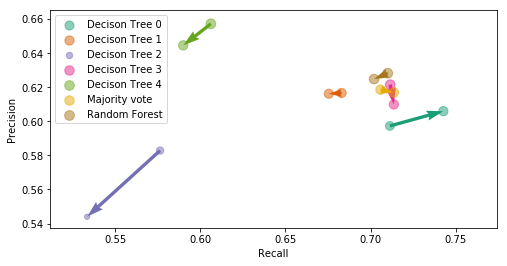

In [27]:
df_list = [perf_tree0,perf_tree1,perf_tree2,perf_tree3,perf_tree4,perf_boost,perf_rf]
labels  = ["Decison Tree 0","Decison Tree 1","Decison Tree 2","Decison Tree 3","Decison Tree 4"
           ,"Majority vote","Random Forest"]
sc_acc = lambda x: (x-0.5)/0.15e-2
cols = plt.get_cmap('Dark2')
plt.figure(figsize=(8,4))
ax = plt.subplot(111)
for im in range(len(df_list)):
    df = df_list[im]
    size = map(sc_acc,df.Accuracy)
    y0 = df.Precision["Train"]
    y1 = df.Precision["Test"]
    x0 = df.Recall["Train"]
    x1 = df.Recall["Test"]
    df.plot.scatter(x="Recall",y="Precision",s=size,alpha=0.5,color=cols(im),label=labels[im],ax=ax)
    plt.quiver(x0, y0, x1-x0, y1-y0, scale_units='xy', angles='xy', scale=1,color=cols(im))
xy = plt.axis('equal')

We clearly see 2 clear outliers amoung the models:
* Decision Tree 2, with poor result in accuracy, precision and recall. It is expected since it is the only model ngelecting blight incidents.
* Decision Tree 4, which has the highest precision, but fairs quite badly in term of Recall. 

As for other models:
* Decision Tree 0 increases in both Precision and Recall as we move from the train set to the test set. As this should not occur, we tend to believe the result form the test set to ba relevant.
* Decision Tree 3 (all incidents counts), majority vote and Random forest are quite tighlty clustered together.
* Decision Tree 1 (blight amounts only) stand out with lower Recall than the tight cluster. 

## 5 Conclusions

Within a previous notebook [Github repository: Preprocessing](https://github.com/BreizhZut/CourseraDataAtScaleCapStone_Predicting_blight_in_Detroit/blob/master/Capstone_preprocessing.ipynb), we prepared two datasets for which we labelled whether or not demolition permit were issued, and processed datasets listing blight-violations, 311 complains and crimes. We added multiple features to the labelled datasets prior to test their pertinance with several decision trees. We have found that

* using the blight violation amounts in place of the number of incidents is more relevant in simple models. 
* the number of crimes and 311 incidents do not provide good results on their own given the it is require to aggregate them at scale quite large compared to the building. But adding these features to the blight violation amounts leads good results in decisions trees especially in term of precision but at the expense of recall.
* boosted models combining all features can help reach an accuracy close to 64%.

Several aspect could help improve predictability of blight

* By associating the parcel id from the parcel dataset to the demolition and blight dataset could extremely improve the quality of the data, by insuring that these seperate datasets could be combined with good accuracy and completeness
* For the purpose of this project we use the same number of demolished building than non demolished ones. Beside the fact that due to the quality of the data, some fraction of the data set may have been mislabeled, date augmentation by adding a larger number of non demolished building may be more relevant to the problem at hand and help improve the accuracy of the models.
* Several extra features could certianly have been added, certainly by extracting more features from the crime and 311 incidents dataset, for exemples counting these incidents by categories pooled by multiple features. Most certainly the parcels dataset we hardly exploited, contains valuable informations that should be added to the models.